In [1]:
import nltk
from nltk.corpus import stopwords
import io
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer, word_tokenize
from math import log, ceil
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import io 
import re
from collections import defaultdict
from fa2 import ForceAtlas2
import numpy as np
from scipy import stats
import unicodedata

In [2]:
raw = io.open('HP_all.txt', "r", encoding="utf-8").read()
tokens = word_tokenize(raw)

In [3]:
book1 = raw[944:441162]
book2 = raw[442547:936710]
book3 = raw[938248:1567329]
book4 = raw[1569412:2678784]
book5 = raw[2680953:4180604]
book6 = raw[4182370:5170313]
book7 = raw[5173433:6317630]

In [4]:
def contractions(text):
    text.replace('don\'t', 'do not')
    text.replace()

In [5]:
stop_words = set(stopwords.words('english'))


In [6]:
print(book1)
h = "hoa er you iahf “mahdu, sjklfsjdf”,fjklf"
b = re.findall(r'\“([\s\S]*?)\”', h)
print(b)
print(type(h), type(book1), type(raw))

CHAPTER ONE





THE BOY WHO LIVED




Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense.

Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.

The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn’t think they could bear it if anyone found out about the Potters. Mrs. Potter was Mrs. Dursley’s sist

“Oh, I will,” said Harry, and they were surprised at the grin that was spreading over his face. “They don’t know we’re not allowed to use magic at home. I’m going to have a lot of fun with Dudley this summer. . . .”
['mahdu, sjklfsjdf']
(<type 'str'>, <type 'unicode'>, <type 'unicode'>)


In [7]:
bok1 = book1.encode("utf-8")
bok1 = bok1.replace('\xe2\x80\x99','\'')
bok1 = bok1.replace('\xe2\x80\x94','-')
bok1 = bok1.replace('\xe2\x80\x98','\'')
bok1 = bok1.replace("\n\n\xe2\x80\x9c", ' ')
dialog1 = re.findall(r'\“([\s\S]*?)\”', bok1)
print(dialog1)

['Little tyke,', "Don't be sorry, my dear sir, for nothing could upset me today! Rejoice, for You-Know-Who has gone at last! Even Muggles like yourself should be celebrating, this happy, happy day!", "Won't!", 'Most mysterious. And now, over to Jim McGuffin with the weather. Going to be any more showers of owls tonight, Jim?', "I don't know about that, but it's not only the owls that have been acting oddly today. Viewers as far apart as Kent, Yorkshire, and Dundee have been phoning in to tell me that instead of the rain I promised yesterday, they've had a downpour of shooting stars! Perhaps people have been celebrating Bonfire Night early - it's not until next week, folks! But I can promise a wet night tonight.", "Er - Petunia, dear - you haven't heard from your sister lately, have you?", 'Why?', 'Owls . . . shooting stars . . . and there were a lot of funny-looking people in town today . . .', 'Potter.', "Their son - he'd be about Dudley's age now, wouldn't he?", 'Yes, I quite agree.'

In [8]:
B1 =  word_tokenize(book1)
B2 =  word_tokenize(book2)
B3 =  word_tokenize(book3)
B4 =  word_tokenize(book4)
B5 =  word_tokenize(book5)
B6 =  word_tokenize(book6)
B7 =  word_tokenize(book7)

In [9]:
print(len(B1)+len(B2)+len(B3)+len(B4)+len(B5)+len(B6)+len(B7))

1426821


In [10]:
FreqDist(B7)['said']

1978

In [11]:
def TF_IDF(documents):
    result = []
    cross_document_freq = defaultdict(int)
    #count in how many documents the token occurs
    for document in documents:
        for token in set(document):
            cross_document_freq[token] += 1 
    
    for document in documents:
        TF = FreqDist(document)
        # calculate the TF/IDF for each token
        TF_IDF = defaultdict(float) 
        for token in TF.keys():
            TF_IDF[token] = TF[token] * log(len(documents)/cross_document_freq[token])
            
        result.append(sorted(TF_IDF.iteritems(), key=lambda (k,v): (v,k), reverse=True))
    return result

In [12]:
def generate_cloud_string(freq_list):
    result = ""
    for token, frequency in freq_list:
        result += (token + " ") * int(ceil(frequency))
    return result   

In [13]:
def display_cloud(string, background="black",title ="",mask=None, collocations=False ):
    cloud = WordCloud(
        background_color=background,
        width=1800,
        height=1400,
        mask = mask,
        collocations=collocations
    ).generate(string)
    plt.figure(figsize=(20,20))
    plt.imshow(cloud)
    plt.axis('off')
    #plt.savefig("./" + title.replace(" ", "") + ".png", dpi=300)
    plt.title(title)
    plt.show()

In [14]:
HM = TF_IDF([B1,B2,B3,B4,B5,B6,B7])

In [15]:
print(B1)

[u'CHAPTER', u'ONE', u'THE', u'BOY', u'WHO', u'LIVED', u'Mr.', u'and', u'Mrs.', u'Dursley', u',', u'of', u'number', u'four', u',', u'Privet', u'Drive', u',', u'were', u'proud', u'to', u'say', u'that', u'they', u'were', u'perfectly', u'normal', u',', u'thank', u'you', u'very', u'much', u'.', u'They', u'were', u'the', u'last', u'people', u'you', u'\u2019', u'd', u'expect', u'to', u'be', u'involved', u'in', u'anything', u'strange', u'or', u'mysterious', u',', u'because', u'they', u'just', u'didn', u'\u2019', u't', u'hold', u'with', u'such', u'nonsense', u'.', u'Mr.', u'Dursley', u'was', u'the', u'director', u'of', u'a', u'firm', u'called', u'Grunnings', u',', u'which', u'made', u'drills', u'.', u'He', u'was', u'a', u'big', u',', u'beefy', u'man', u'with', u'hardly', u'any', u'neck', u',', u'although', u'he', u'did', u'have', u'a', u'very', u'large', u'mustache', u'.', u'Mrs.', u'Dursley', u'was', u'thin', u'and', u'blonde', u'and', u'had', u'nearly', u'twice', u'the', u'usual', u'amount',

In [16]:
CI1 = generate_cloud_string(HM[0])
CI2 = generate_cloud_string(HM[1])
CI3 = generate_cloud_string(HM[2])
CI4 = generate_cloud_string(HM[3])
CI5 = generate_cloud_string(HM[4])
CI6 = generate_cloud_string(HM[5])
CI7 = generate_cloud_string(HM[6])

In [17]:
light_blue = "#cce5ff"

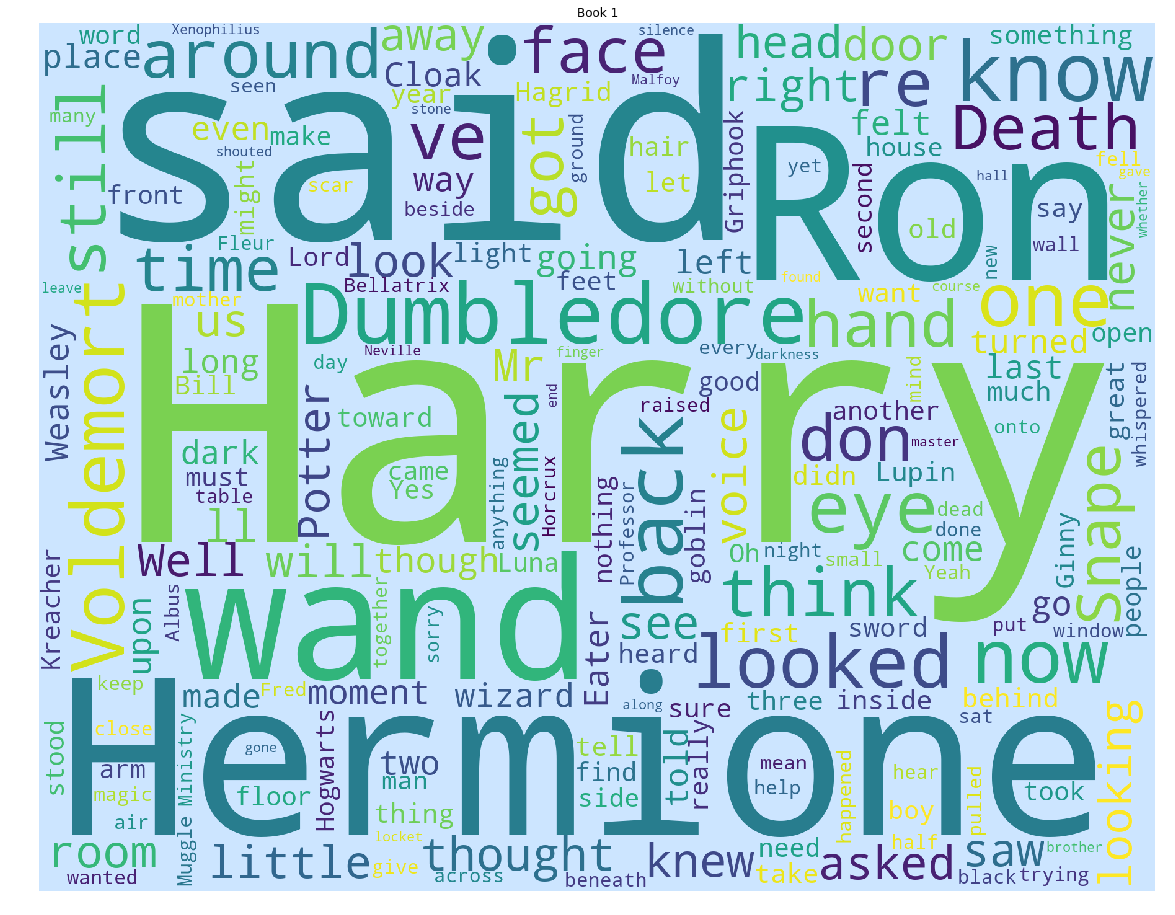

In [18]:
display_cloud(" ".join(B7), light_blue, "Book 1")

In [19]:
from nltk.draw.dispersion import dispersion_plot
text = nltk.Text(B1)

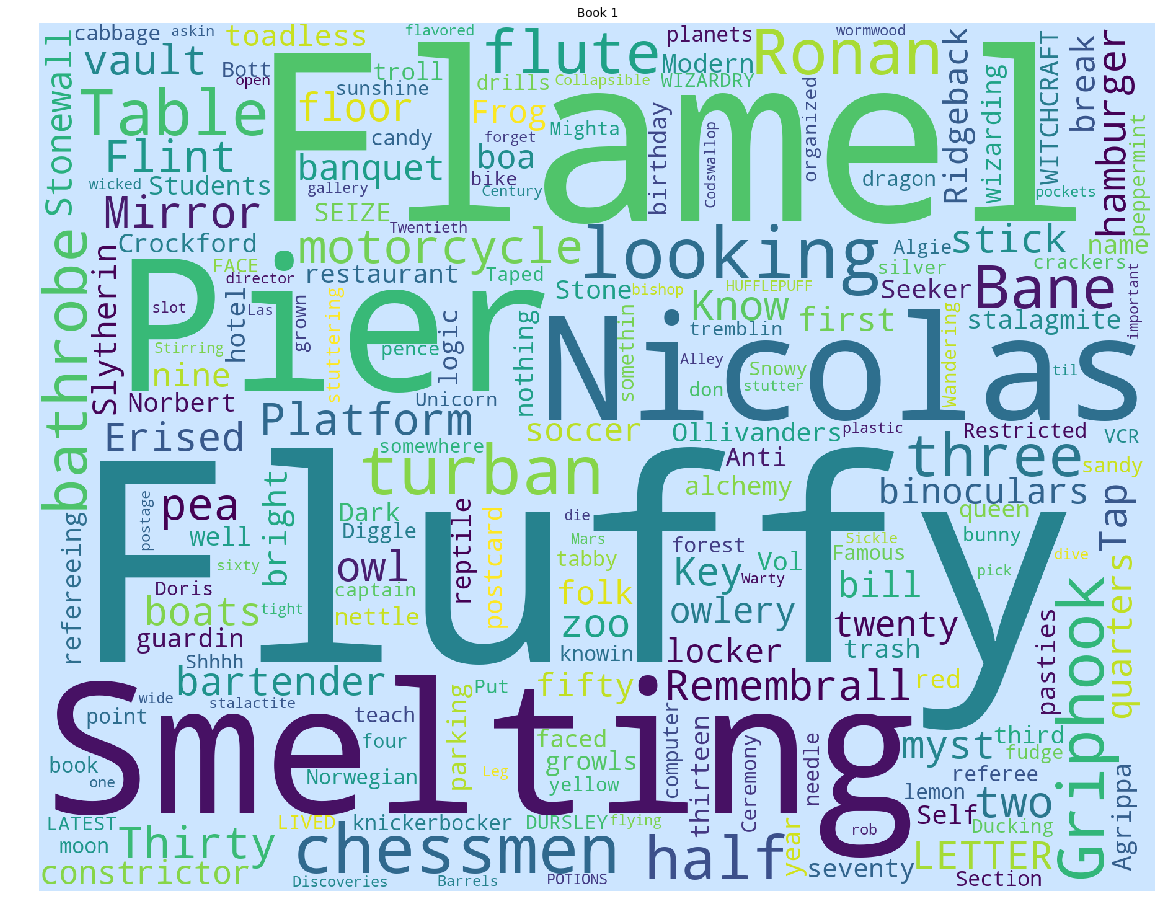

In [20]:
display_cloud(CI1, light_blue, "Book 1")

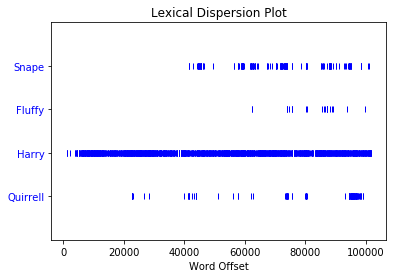

In [21]:
text.dispersion_plot(["Snape", "Fluffy", "Harry", "Quirrell"])

In [22]:
raw = io.open('Scripts/(2)_Harry_Potter_and_the_Chamber_of_Secrets.txt', "r", encoding="utf-8").read()
raw[800:2000]

u" was afraid he'd turn us into dung beetles if you put him back in the cupboard under the stairs.\n\nAUNT PETUNIA stops cold, exchanges a dark look with Uncle\nVernon, then sees Dudley extending a finger for the\npudding.\nAUNT PETUNIA\nNot yet, popkin. That's for when\nthe Masons arrive.\nUNCLE VERNON\nWhich should be any moment. Now.\nLet's run through our schedule one\nmore time. Petunia, when the\nMasons get here, you will be -AUNT PETUNIA\nIn the lounge, waiting to welcome\nthem graciously to our home.\nGood.\n\nUNCLE VERNON\nAnd Dudley?\n\nDUDLEY\nI'll be waiting to open the door.\nUNCLE VERNON\nExcellent.\n(turning on Harry)\nAnd you?\n(CONTINUED)\n\n\x0cTHE CHAMBER OF SECRETS - Rev. 5/14/02\n4\n\nCONTINUED:\n\n3.\n\n(2)\n\n4\n\nHARRY\nI'll be in my bedroom, making no\nnoise and pretending I don't\nexist.\nUNCLE VERNON\nToo right you will. With any\nluck, this could well be the day I\nmake the biggest deal of my\ncareer.\nDOORBELL RINGS. Instantly, Uncle Vernon shoves Harry out

In [23]:
from nltk.util import bigrams

In [24]:
def generate_collocations(tokens):
    '''
    Given list of tokens, return collocations.
    '''

    ignored_words = nltk.corpus.stopwords.words('english')
    bigram_measures = nltk.collocations.BigramAssocMeasures()

    # Best results with window_size, freq_filter of: (2,1) (2,2) (5,1)
    finder = nltk.collocations.BigramCollocationFinder.from_words(tokens, window_size = 2)
    finder.apply_word_filter(lambda w: len(w) < 3 or w.lower() in ignored_words)
    finder.apply_freq_filter(1)

    colls = finder.nbest(bigram_measures.likelihood_ratio, 100)

    return colls 

In [25]:
generate_collocations(B1)

[(u'Uncle', u'Vernon'),
 (u'Professor', u'McGonagall'),
 (u'Aunt', u'Petunia'),
 (u'said', u'Ron'),
 (u'said', u'Harry'),
 (u'said', u'Hagrid'),
 (u'Mr.', u'Dursley'),
 (u'Privet', u'Drive'),
 (u'common', u'room'),
 (u'Nimbus', u'Two'),
 (u'Great', u'Hall'),
 (u'Mrs.', u'Dursley'),
 (u'Madam', u'Pomfrey'),
 (u'Invisibility', u'Cloak'),
 (u'Mr.', u'Ollivander'),
 (u'Two', u'Thousand'),
 (u'Leaky', u'Cauldron'),
 (u'Madam', u'Hooch'),
 (u'Mrs.', u'Norris'),
 (u'said', u'Hermione'),
 (u'first', u'years'),
 (u'Hermione', u'Granger'),
 (u'Nicolas', u'Flamel'),
 (u'Professor', u'Flitwick'),
 (u'Fat', u'Lady'),
 (u'Lee', u'Jordan'),
 (u'Professor', u'Dumbledore'),
 (u'Smelting', u'stick'),
 (u'Professor', u'Quirrell'),
 (u'looked', u'like'),
 (u'House', u'Cup'),
 (u'could', u'see'),
 (u'Flavor', u'Beans'),
 (u'Harry', u'Potter'),
 (u'Diagon', u'Alley'),
 (u'said', u'Dumbledore'),
 (u'entrance', u'hall'),
 (u'Bloody', u'Baron'),
 (u'High', u'Table'),
 (u'Chocolate', u'Frogs'),
 (u'Madam', u'Ma